# Natural Correlation Function

# $\xi = \frac{DD}{RR} - 1$

# preparing data

In [191]:
gr_13 = data[(data['mass']<13.2)&(data['mass']>12.6)]
gr_12 = data[(data['mass']<1.1e12)&(data['mass']>9e11)]

In [192]:
len(gr_12)

6436

In [193]:
xyz_13 = gr_13[['x','y','z']]/1000 
xyz_12 = gr_12[['x','y','z']]/1000 

In [194]:
x13 = xyz_13['x'].values
y13 = xyz_13['y'].values
z13 = xyz_13['z'].values
x12 = xyz_12['x'].values
y12 = xyz_12['y'].values
z12 = xyz_12['z'].values

In [195]:
bins = np.linspace(1,10,10)
bincenters = 0.5*(bins[1:]+bins[:-1])

In [196]:
def distance(x1,y1,z1,x2,y2,z2):
    return (((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)**0.5)

In [197]:
DD = np.zeros((len(xyz_13),len(xyz_13)),dtype = 'float')
RR = np.zeros((len(xyz_13),len(xyz_13)),dtype='float')

In [198]:
%%time
for i in range(len(xyz_13)):
    
        
    for j in range(len(xyz_13)):
        
        
        DD[i,j]=distance(x13[i],y13[i],z13[i],x13[j],y13[j],z13[j])
        
xr = np.random.uniform(np.amin(x13),np.amax(x13),len(x13))
yr = np.random.uniform(np.amin(y13),np.amax(y13),len(y13))
zr = np.random.uniform(np.amin(z13),np.amax(z13),len(z13))

for i in range(len(xr)):
    
        
    for j in range(len(xr)):
        
        
        RR[i,j]=distance(xr[i],yr[i],zr[i],xr[j],yr[j],zr[j])


Wall time: 5min 28s


In [199]:
np.amax(z13)

204.81293

In [200]:
dd = DD[np.triu_indices(len(x13), k = 1)]
rr = RR[np.triu_indices(len(x13), k = 1)]

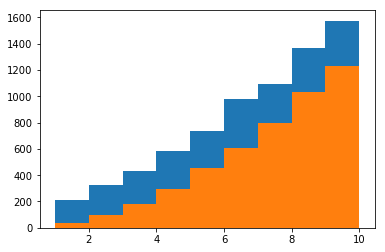

In [201]:
counts_dd,bins,_ = plt.hist(dd,bins);
counts_rr,bins,_ = plt.hist(rr,bins);

In [204]:
xi = counts_dd/counts_rr - 1

Text(0,0.5,'$\\xi(r)$')

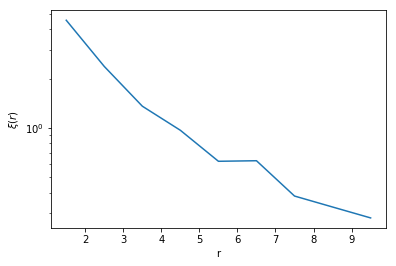

In [205]:
plt.plot(bincenters,xi)
plt.yscale('log')
plt.xlabel('r')
plt.ylabel('$\\xi(r)$')

# test

In [206]:
import halotools.mock_observables

In [207]:
xyz_r = np.vstack((xr,yr,zr)).T

In [208]:
xyz_r.shape

(4530, 3)

In [216]:
corr=  halotools.mock_observables.tpcf(xyz_13, bins,randoms = xyz_r, period=205, estimator='Natural')
corr2 =  halotools.mock_observables.tpcf(xyz_13, bins, period=205, estimator='Natural')

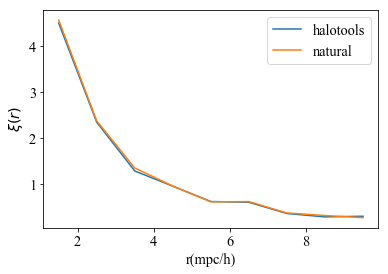

In [280]:
plt.plot(bincenters,corr,label='halotools')
plt.plot(bincenters,xi,label='natural')
#plt.plot(bincenters,corr2,label='halotools(analythic random)')

#plt.yscale('log')
#plt.plot(bincenters,xi,label='natural')
#plt.yscale('log')
plt.legend(loc=0)
plt.ylabel('$\\xi(r)$')
plt.xlabel('r(mpc/h)')
plt.savefig('test_correlation.jpg')

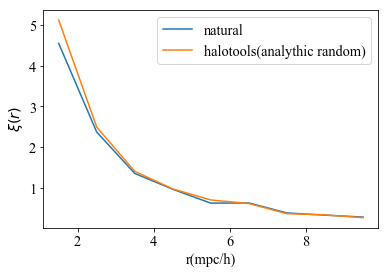

In [281]:
plt.plot(bincenters,xi,label='natural')
plt.plot(bincenters,corr2,label='halotools(analythic random)')
#plt.yscale('log')
#plt.plot(bincenters,xi,label='natural')
#plt.yscale('log')
plt.legend(loc=0)
plt.ylabel('$\\xi(r)$')
plt.xlabel('r(mpc/h)')
plt.savefig('test_correlation2.jpg')